In [39]:
import kagglehub
print(f"KaggleHub Imported {kagglehub.__version__}")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print(f"Pandas Imported {pd.__version__}")
print(f"Numpy Imported {np.__version__}")
print(f"Matplotlib Imported Latest")

import os
import sys

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

KaggleHub Imported 0.3.12
Pandas Imported 2.3.0
Numpy Imported 2.0.0
Matplotlib Imported Latest


In [40]:
path = kagglehub.dataset_download("muhammadbinimran/housing-price-prediction-data")

print("Path to dataset files:", path)

df = pd.read_csv(os.path.join(path, "housing_price_dataset.csv"))
print("Dataset Loaded Successfully")
print("DataFrame shape:", df.shape)
print("\nNull Values Found")
print(df.isnull().sum())

scaler = StandardScaler()

Path to dataset files: C:\Users\f16sa\.cache\kagglehub\datasets\muhammadbinimran\housing-price-prediction-data\versions\1
Dataset Loaded Successfully
DataFrame shape: (50000, 6)

Null Values Found
SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64


In [41]:
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


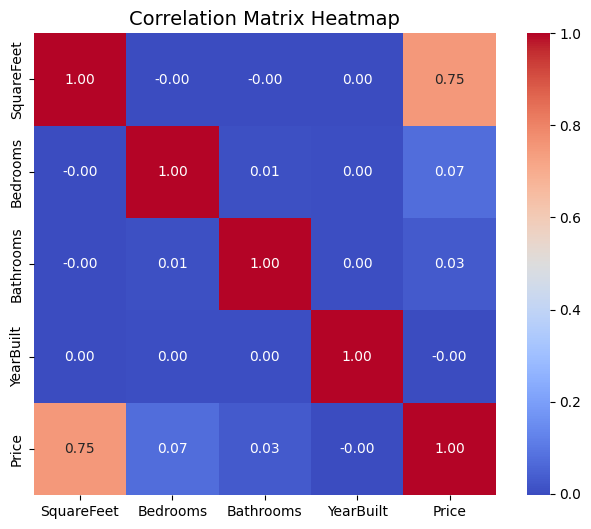

In [42]:
corr_matrix = df.drop(columns=["Neighborhood"]).corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True, square=True)
plt.title("Correlation Matrix Heatmap", fontsize=14)
plt.show()

In [43]:
model_df = df.drop(columns=["Neighborhood", "Bedrooms", "Bathrooms", "YearBuilt"])
model_df.head()

,SquareFeet,Price
0,2126,215355.283618
1,2459,195014.221626
2,1860,306891.012076
3,2294,206786.787153
4,2130,272436.239065


In [44]:
X = model_df.drop(columns=["Price"])
y = model_df["Price"]
print(X.head())
print("\n")
print(y.head())

   SquareFeet
0        2126
1        2459
2        1860
3        2294
4        2130


0    215355.283618
1    195014.221626
2    306891.012076
3    206786.787153
4    272436.239065
Name: Price, dtype: float64


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [46]:
y_pred = model.predict(X_test)
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R²: 0.5703289305615942
RMSE: 49661.77503452086


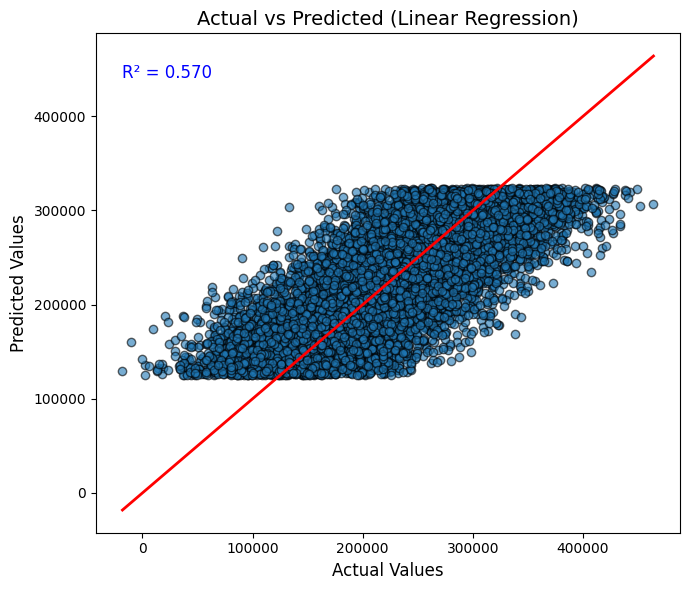

In [47]:
# Scatter plot: Actual vs Predicted
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor="k")
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Actual vs Predicted (Linear Regression)", fontsize=14)

# Plot perfect fit line
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color="red", linewidth=2)

# Show R² on plot
r2 = r2_score(y_test, y_pred)
plt.text(min_val, max_val*0.95, f"R² = {r2:.3f}", fontsize=12, color="blue")

plt.tight_layout()
plt.show()